IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

MEMBUAT DATAFRAME

In [2]:
data = {
    'NIM': [
        'TI001', 'TI002', 'TI003', 'TI004', 'TI005',
        'TI006', 'TI007', 'TI008', 'TI009', 'TI010'
    ],
    'HASIL_SEBENARNYA': [
        'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus',
        'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus'
    ],
    'HASIL_PREDIKSI': [
        'Lulus', 'Lulus', 'Lulus', 'Tidak Lulus', 'Tidak Lulus',
        'Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus', 'Tidak Lulus'
    ]
}

df = pd.DataFrame(data)
df

,NIM,HASIL_SEBENARNYA,HASIL_PREDIKSI
0,TI001,Lulus,Lulus
1,TI002,Lulus,Lulus
2,TI003,Lulus,Lulus
3,TI004,Lulus,Tidak Lulus
4,TI005,Lulus,Tidak Lulus
5,TI006,Tidak Lulus,Lulus
6,TI007,Tidak Lulus,Tidak Lulus
7,TI008,Tidak Lulus,Tidak Lulus
8,TI009,Tidak Lulus,Tidak Lulus
9,TI010,Tidak Lulus,Tidak Lulus


ENCODING LABEL (LULUS / TIDAK LULUS - 1/10

In [3]:
replacements = {
    'HASIL_SEBENARNYA': {'Lulus': 1, 'Tidak Lulus': 0},
    'HASIL_PREDIKSI'  : {'Lulus': 1, 'Tidak Lulus': 0}
}

df_enc = df.replace(replacements, inplace=False)
df_enc

/tmp/ipython-input-3358450460.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_enc = df.replace(replacements, inplace=False)


,NIM,HASIL_SEBENARNYA,HASIL_PREDIKSI
0,TI001,1,1
1,TI002,1,1
2,TI003,1,1
3,TI004,1,0
4,TI005,1,0
5,TI006,0,1
6,TI007,0,0
7,TI008,0,0
8,TI009,0,0
9,TI010,0,0


In [4]:
y_true = df_enc['HASIL_SEBENARNYA']   # label asli
y_pred = df_enc['HASIL_PREDIKSI']     # hasil prediksi model

CONFUSION MATRIX

Confusion Matrix:
                        Pred Lulus (1)  Pred Tidak Lulus (0)
Aktual Lulus (1)                     4                     1
Aktual Tidak Lulus (0)               2                     3


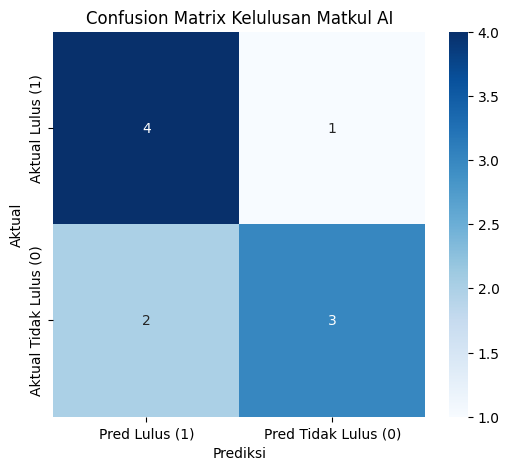

In [5]:
cm = confusion_matrix(y_true, y_pred)  # default: kelas positif = 1

# Biar rapi jadi tabel
cm_df = pd.DataFrame(
    cm,
    index=['Aktual Lulus (1)', 'Aktual Tidak Lulus (0)'],
    columns=['Pred Lulus (1)', 'Pred Tidak Lulus (0)']
)
print("Confusion Matrix:")
print(cm_df)

# Visualisasi heatmap (mirip praktikum)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Kelulusan Matkul AI")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

MENGHITUNG AKURASI, PRESISI, DAN RECALL

In [6]:
accuracy  = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label=1)  # 1 = Lulus
recall    = recall_score(y_true, y_pred, pos_label=1)

print(f"Akurasi  : {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall   : {recall*100:.2f}%")

Akurasi  : 70.00%
Precision: 75.00%
Recall   : 60.00%
